<a href="https://colab.research.google.com/github/phdo94/Section4_project/blob/main/AI_02_%E1%84%87%E1%85%A1%E1%86%A8%E1%84%92%E1%85%A5%E1%86%AB%E1%84%83%E1%85%A9_Section4_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import math
import json 
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
dataset_path = r"/content/drive/MyDrive/Colab Notebooks/Data/genres_original"
SAMPLE_RATE = 22050
DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

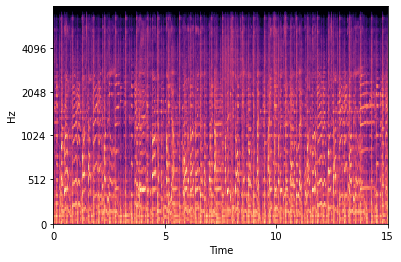

In [3]:
# blues 데이터를 불러와서 샘플로 한개만 봅니다
import librosa
import librosa.display
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/genres_original/blues/blues.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time'); 

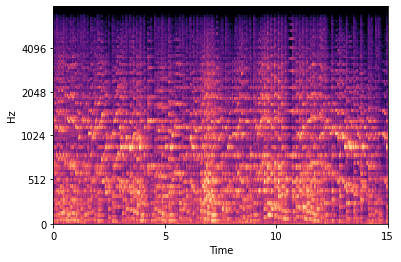

In [4]:
# 모든 장르의 파형을 샘플로 확인해봅니다.
# 클래식
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/genres_original/classical/classical.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time'); 

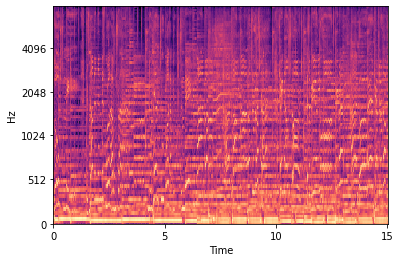

In [5]:
# 컨트리
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/genres_original/country/country.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time'); 

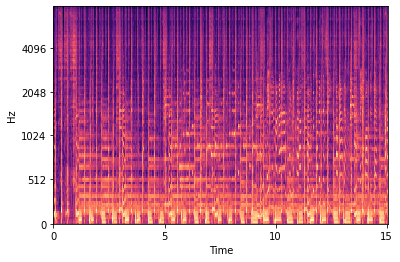

In [6]:
# 디스코
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/genres_original/disco/disco.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time'); 

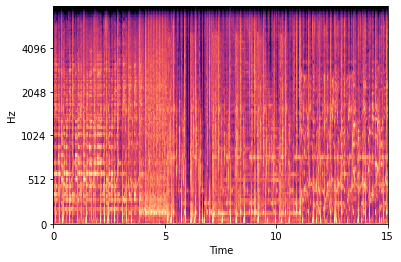

In [7]:
# 힙합
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/genres_original/hiphop/hiphop.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time'); 

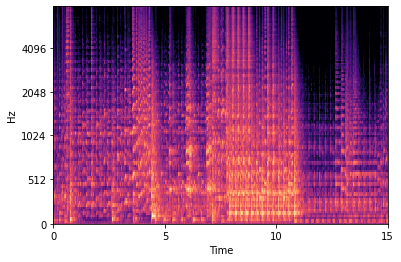

In [8]:
# 재즈
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/genres_original/jazz/jazz.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time'); 

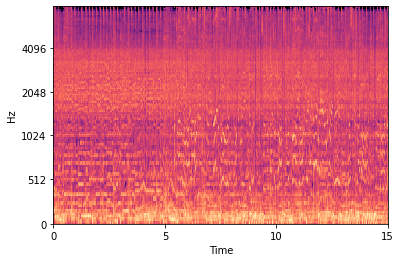

In [9]:
# 메탈
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/genres_original/metal/metal.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time'); 

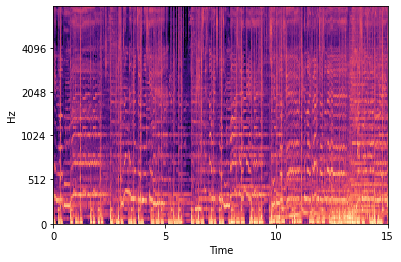

In [10]:
# 팝
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/genres_original/pop/pop.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time'); 

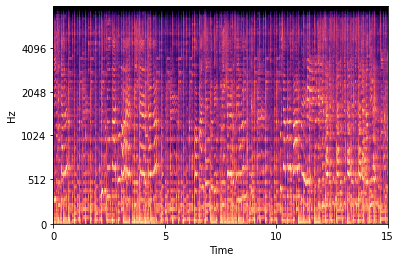

In [11]:
# 레게
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/genres_original/reggae/reggae.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time'); 

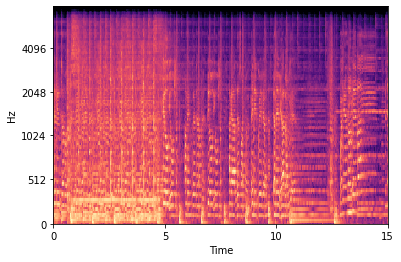

In [12]:
# 락
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/genres_original/rock/rock.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time'); 

In [13]:
# 데이터를 딕셔너리에 저장합니다.
data = {
    "mapping": [],
    "mfcc": [],
    "labels": []
    }
num_segments = 10
hop_length=512
n_mfcc=13
n_fft=2048
samples_ps = int(SAMPLES_PER_TRACK/num_segments)
expected_vects_ps = math.ceil(samples_ps/hop_length)
    
# 모든 장르에 대해 적용하기위한 루프를 짭니다.
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    # ensuring not at root
    if dirpath is not dataset_path:
        # semantic label을 저장합니다.
        dirpath_comp = dirpath.split("/")
        semantic_label = dirpath_comp[-1]
        if semantic_label == ".ipynb_checkpoints": # 쓸데없이 계속 읽혀서 제외시켜버려야 합니다.
          continue
        else:
          data["mapping"].append(semantic_label)
          print(f"Processing: {semantic_label}")
            
        
        
          # 특정 장르의 파일에 대해 처리해줍니다.(파일 형식을 읽지못하는 오류때문에)
          for f in filenames:
              if (f==str("jazz.00054.wav")): # 이 자식이 안 읽히는 파일
                  # librosa는 1Mb 이하 파일만 읽을 수 있음
                  continue
              else:
                  # 오디오 파일을 불러옵니다.
                  file_path = os.path.join(dirpath, f)
                  signal,sr = librosa.load(file_path,sr=SAMPLE_RATE)
                  for s in range(num_segments):
                      start_sample = samples_ps * s
                      finish_sample = start_sample + samples_ps

                      mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
                                                  sr = sr,
                                                  n_fft = n_fft,
                                                  n_mfcc = n_mfcc,
                                                  hop_length = hop_length)

                      mfcc = mfcc.T

                      # 예상한 길이의 mfcc를 저장 
                      if len(mfcc)==expected_vects_ps:
                          data["mfcc"].append(mfcc.tolist())
                          data["labels"].append(i-1)
print(len(filenames))                     

Processing: metal
Processing: pop
Processing: country
Processing: rock
Processing: reggae
Processing: disco
Processing: classical
Processing: hiphop
Processing: jazz
Processing: blues
100


In [14]:
print(data['mapping'])

['metal', 'pop', 'country', 'rock', 'reggae', 'disco', 'classical', 'hiphop', 'jazz', 'blues']


In [15]:
print(data['labels'])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [16]:
# epoch을 거치고 이후에 정확도와 loss를 한눈으로 보기위해 시각화 함수를 만듭니다.
def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [17]:
# 시드고정
tf.random.set_seed(42)
np.random.seed(1100)

In [18]:
# 모델훈련과 분석을 위해 train, val, test로 나눠줍니다.
def prepare_datasets(test_size, validation_size):

    # load data
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [19]:
# 모델을 만들어줍니다.
def build_model(input_shape):

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [20]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

In [21]:
input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
model = build_model(input_shape)
optimiser = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 31s 143ms/step - loss: 1.8406 - accuracy: 0.3270 - val_loss: 1.6868 - val_accuracy: 0.3765
Epoch 2/50
188/188 [==============================] - 26s 136ms/step - loss: 1.6040 - accuracy: 0.4113 - val_loss: 1.5056 - val_accuracy: 0.4399
Epoch 3/50
188/188 [==============================] - 26s 139ms/step - loss: 1.4836 - accuracy: 0.4498 - val_loss: 1.3711 - val_accuracy: 0.4813
Epoch 4/50
188/188 [==============================] - 26s 139ms/step - loss: 1.4486 - accuracy: 0.4685 - val_loss: 1.3663 - val_accuracy: 0.4887
Epoch 5/50
188/188 [==============================] - 26s 138ms/step - loss: 1.3360 - accuracy: 0.5119 - val_loss: 1.3291 - val_accuracy: 0.5107
Epoch 6/50
188/188 [==============================] - 25s 135ms/step - loss: 1.2841 - accuracy: 0.5358 - val_loss: 1.1982 - val_accuracy: 0.5461
Epoch 7/50
188/188 [==============================] - 26s 139ms/step - loss: 1.2338 - accuracy: 0.5438 - val_loss: 1.1516 - val_ac

In [23]:
# checkpoint_filepath = "FMbest.hdf5"
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1)
# save_best = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
#     save_weights_only=True, mode='auto', save_freq='epoch', options=None)

# callbacks=[early_stop, save_best]

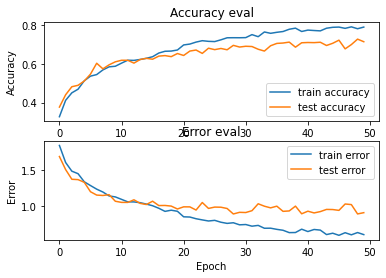

In [24]:
plot_history(history)

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 3s - loss: 0.9466 - accuracy: 0.7101

Test accuracy: 0.7100520730018616


In [26]:
def predict(model, X, y):
    X = X[np.newaxis,...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index: {predicted_index}")

In [30]:
predict(model, X_test[98], y_test[98])

Expected index: 3, Predicted index: [3]
